In [1]:
from SLOGmodules import SLOGtools as SLOGtools
from SLOGmodules import SLOGdata as SLOGdata
import numpy as np
from numpy import linalg as LA
from SLOGmodules import SLOGexperiments as SLOGexp
from SLOGmodules import graphTools as graphTools

In [2]:
nNodes = 20
S = 2
P = 400
L = 5
N_realiz = 10
N_noiseLvs = 10
d_noiseLvs = 0.001
n0 = 0
# graphType = 'SBM' # Type of graph
# graphOptions = {} # Dictionary of options to pass to the graphTools.createGraph function
# graphOptions['nCommunities'] = nClasses # Number of communities
# graphOptions['probIntra'] = 0.8 # Probability of drawing edges intra communities
# graphOptions['probInter'] = 0.2 # Probability of drawing edges inter communities

# graphType = 'Random Geometric' # Type of graph
# graphOptions = {} # Dictionary of options to pass to the graphTools.createGraph function
# graphOptions['distance'] = 0.2 # Number of communities

# graphType = 'BA' # Type of graph
# graphOptions = {} # Dictionary of options to pass to the graphTools.createGraph function
# graphOptions['alpha'] = 1.0

graphType = 'ER' # Type of graph
graphOptions = {} # Dictionary of options to pass to the graphTools.createGraph function
graphOptions['probIntra'] = 0.3 # Probability of drawing edges

simuParas = {}

simuParas['graphType'] = graphType
simuParas['graphOptions'] = graphOptions
simuParas['alpha'] = 1.0
simuParas['noiseType'] = 'uniform'
simuParas['noiseLevel'] = 0

     

In [3]:
noiseLvs = n0 + d_noiseLvs*np.arange(N_noiseLvs)
result_re_x = np.zeros([N_noiseLvs,N_realiz])
result_re_g = np.zeros([N_noiseLvs,N_realiz])

for n_nlvs in range(N_noiseLvs):
    simuParas['noiseLevel'] = noiseLvs[n_nlvs]
    print('noiseLevel = ', noiseLvs[n_nlvs])
    result = SLOGexp.admmExperiment(nNodes, S, P, L, N_realiz, simuParas = simuParas)
    re_x = result['re_x']
    re_g = result['re_g']
    result_re_x[n_nlvs,:] = re_x
    result_re_g[n_nlvs,:] = re_g  

noiseLevel =  0.0
n_realiz =  0
n_realiz =  1
n_realiz =  2
n_realiz =  3
n_realiz =  4
n_realiz =  5
n_realiz =  6
n_realiz =  7
n_realiz =  8
n_realiz =  9
noiseLevel =  0.001
n_realiz =  0
n_realiz =  1
n_realiz =  2
n_realiz =  3
n_realiz =  4
n_realiz =  5
n_realiz =  6
n_realiz =  7
n_realiz =  8
n_realiz =  9
noiseLevel =  0.002
n_realiz =  0
n_realiz =  1
n_realiz =  2
n_realiz =  3
n_realiz =  4
n_realiz =  5
n_realiz =  6
n_realiz =  7
n_realiz =  8
n_realiz =  9
noiseLevel =  0.003
n_realiz =  0
n_realiz =  1
n_realiz =  2
n_realiz =  3
n_realiz =  4
n_realiz =  5
n_realiz =  6
n_realiz =  7
n_realiz =  8
n_realiz =  9
noiseLevel =  0.004
n_realiz =  0
n_realiz =  1
n_realiz =  2
n_realiz =  3
n_realiz =  4
n_realiz =  5
n_realiz =  6
n_realiz =  7


KeyboardInterrupt: 

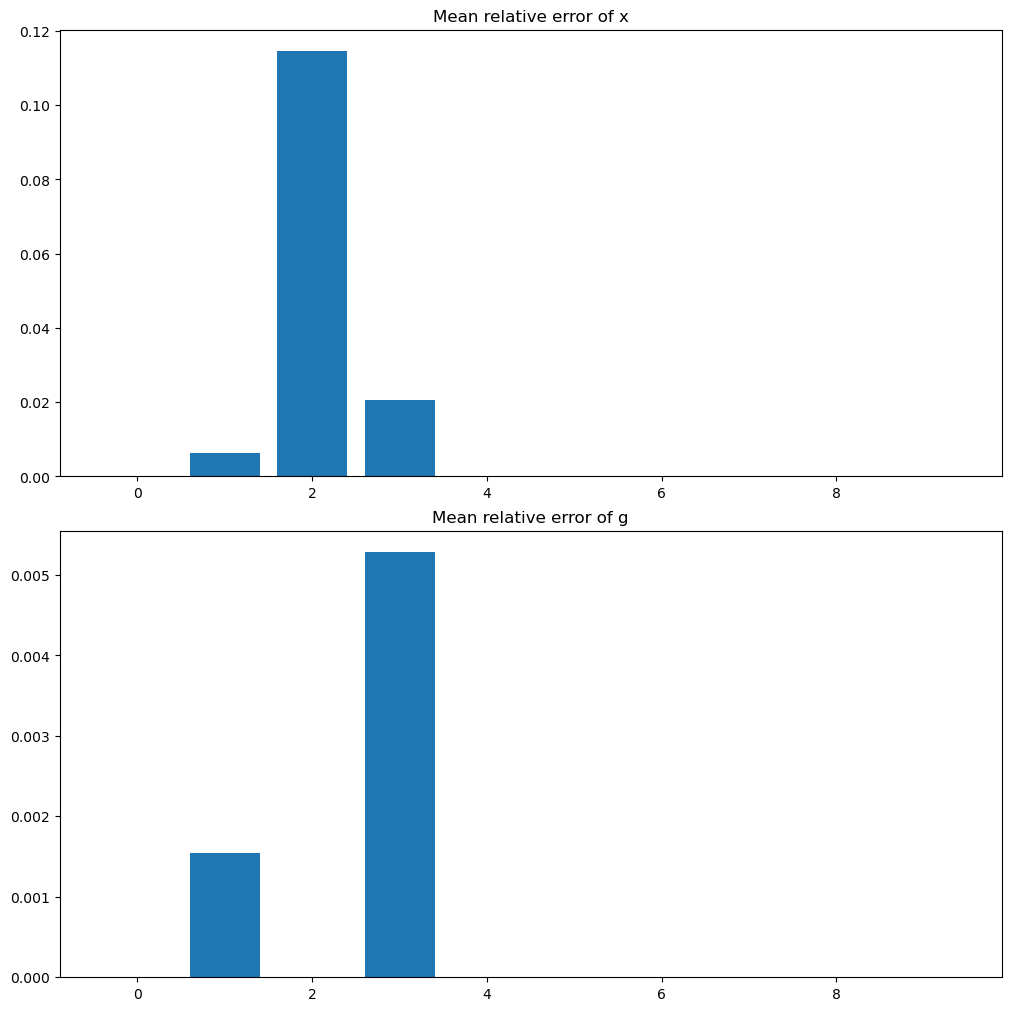

In [5]:
import matplotlib.cm as cm
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams.update(mpl.rcParamsDefault)

re_x_avg = np.mean(result_re_x, 1)
re_g_avg = np.mean(result_re_g, 1)

fig, axes = plt.subplots(nrows=2, ncols=1, constrained_layout=True,figsize=(10,10))
axes[0].bar(np.array(range(N_noiseLvs)),re_x_avg)
axes[0].set_title('Mean relative error of x')
axes[1].bar(np.array(range(N_noiseLvs)),re_g_avg)
axes[1].set_title('Mean relative error of g')

# n_realiz = 9
# axes[0].bar(np.array(range(N_realiz)),result_re_x[:,n_realiz])
# axes[0].set_title('Mean relative error of x')
# axes[1].bar(np.array(range(N_realiz)),result_re_g[:,n_realiz])
# axes[1].set_title('Mean relative error of g')
plt.show()

In [ ]:
## Single experiment
from SLOGmodules import SLOGexperiments as SLOGexp
simuParas['noiseLevel'] = 0.01
result = SLOGexp.admmExperiment_single(nNodes, S, P, L, simuParas = simuParas)
re_x = result['re_x']
re_g = result['re_g']
ite_list = result['ite_list']
X = result['X0']
Y = result['Y']
g0 = result['g0']
X_hat = result['X_hat']
g_hat = result['g_hat']
gso = result['gso']
graphTools.plotGraph(gso)
print('re_x = ',re_x)
print('re_g = ',re_g)
print('ite_list = ', ite_list)


In [ ]:
import matplotlib.cm as cm
import matplotlib
import matplotlib.pyplot as plt
max_X = np.max(np.abs(X))
max_X_hat = np.max(np.abs(X_hat))
max_Y = np.max(np.abs(Y))

fig, axes = plt.subplots(nrows=5, ncols=1, constrained_layout=True,figsize=(10,10))
axes[0].imshow(X,  cmap=cm.seismic,vmin = -max_X, vmax = max_X)
axes[0].set_title('(true) X_{test}')
axes[0].set_ylabel('N')
axes[1].imshow(X_hat,  cmap=cm.seismic,vmin = -max_X_hat, vmax = max_X_hat)
axes[1].set_title('(true) X_{test}')
axes[1].set_ylabel('N')
axes[2].imshow(Y, cmap=cm.seismic,vmin = -max_Y, vmax = max_Y)
axes[2].set_title('Y')
axes[2].set_ylabel('N')
axes[3].bar(np.array(range(nNodes)),g0)
axes[3].set_title('(true) filter coefficient g')
axes[4].bar(np.array(range(nNodes)),g_hat)
axes[4].set_title('(recovered) filter coefficient v')



In [ ]:
# rho_0 = 1
# eta_0 = 1
# C = nNodes
# N_ite = 10000
# max_re = 1e-9
# x_hat,g_hat,n_ite,max_re_matched = SLOGtools.admm(Y,V,rho_0,eta_0,C,N_ite,max_re)
# x_hat = SLOGdata.to_numpy(x_hat)
# g_hat = SLOGdata.to_numpy(g_hat)

# print(n_ite, max_re_matched)
# print(LA.norm(x - x_hat)/LA.norm(x))
# print(LA.norm(g0 - g_hat)/LA.norm(g0))



In [ ]:
# print(sum(g_hat))

In [ ]:
# def admm(Y,V,rho_0,eta_0,C,N_ite,max_re):
#     N = V.shape[0]
#     P = Y.shape[1]
# #     Y = torch.tensor(Y)
#     Z = torch.tensor(linalg.khatri_rao(np.dot(np.transpose(Y),V),V),requires_grad=False)
#     v = torch.tensor(np.zeros(N))
#     x = torch.tensor(np.zeros(N*P))
#     u = torch.tensor(np.zeros(N*P))
#     eta = torch.tensor(np.zeros(1))
#     II = torch.tensor(np.ones([N,N]))
#     In = torch.tensor(np.ones(N)) # ones(N,1)
#     n_ite = 0
#     max_re_matched = 0
#     while n_ite < N_ite and max_re_matched ==0 :
#         v_old = v
#         x_old = x
#         ZIk_inv = fast_inverse(torch.matmul(torch.transpose(Z,0,1),Z),eta_0/rho_0)/rho_0
# #         ZIk = rho_0*torch.matmul(torch.transpose(Z,0,1),Z) + eta_0*II
# #         ZIk_inv = torch.pinverse(ZIk)
#         v_temp = torch.matmul(torch.transpose(Z,0,1),rho_0*x - u) + (eta_0*C-eta)*In
#         v = torch.matmul(ZIk_inv, v_temp)
#         X_update = torch.nn.Softshrink(lambd = 1/rho_0)
#         x = X_update(torch.matmul(Z,v) + 1/rho_0*u)
#         u = u + rho_0*(torch.matmul(Z,v) - x)
#         eta = eta + eta_0*(torch.matmul(torch.tensor(np.ones([1,N])),v) - C)
#         re = ((v-v_old)**2).mean()/(1e-10 + ((v_old)**2).mean())
#         if re < max_re**2:
# #             print('re = ',re)
#             max_re_matched = 1
#         n_ite += 1
#     return x,v,n_ite,max_re_matched

# def g_generate_gso(N,alpha, eigenvalues,L):
#     Vd = np.vander(eigenvalues,L)
#     Vd = np.fliplr(Vd)
#     g = alpha*np.random.normal(0, 1, L)
#     g[0] = 1
#     g_tilde = np.dot(Vd,g)
#     g_tilde = N*g_tilde/sum(g_tilde)
#     return g_tilde

# def h_generate_gso(N,alpha, eigenvalues,L):
#     Vd = np.vander(eigenvalues,L)
#     Vd = np.fliplr(Vd)
#     h = alpha*np.random.normal(0, 1, L)
#     h[0] = 1
#     h_tilde = np.dot(Vd,h)
#     h_tilde = N*h_tilde/sum(h_tilde)
#     g_tilde = 1/h_tilde    
#     return g_tilde

In [ ]:
N_noiseLvs = 10
d_noiseLvs = 0.001
n0 = 0
noiseLvs = n0 + d_noiseLvs*np.arange(N_noiseLvs)
print(noiseLvs)